#**Exponential smoothing**



##  install these libraries using pip:



In [44]:
!pip install pandas matplotlib

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [46]:
df = pd.read_csv('/content/traffic (4).csv',parse_dates=['DateTime'],index_col='DateTime')
print(df.head())

                     Junction  Vehicles           ID
DateTime                                            
2015-11-01 00:00:00         1        15  20151101001
2015-11-01 01:00:00         1        13  20151101011
2015-11-01 02:00:00         1        10  20151101021
2015-11-01 03:00:00         1         7  20151101031
2015-11-01 04:00:00         1         9  20151101041


In [54]:
df_part=df.iloc[:500]
df_part.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [55]:
df_part=df_part.drop(['Junction','ID'],axis=1)
df_part.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9


## Visualizing the data





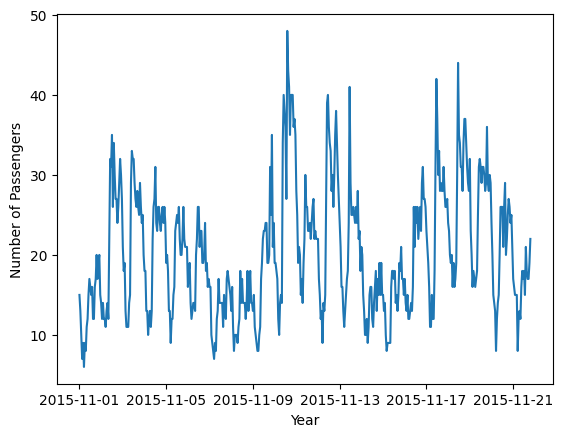

In [68]:
plt.plot(df_part)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

#**Single Exponential smoothing**





In [69]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(df_part)
model_single_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions





In [59]:
forecast_single = model_single_fit.forecast(6)
print(forecast)

2015-11-05 04:00:00    13.0
2015-11-05 05:00:00    13.0
2015-11-05 06:00:00    13.0
2015-11-05 07:00:00    13.0
2015-11-05 08:00:00    13.0
2015-11-05 09:00:00    13.0
Freq: H, dtype: float64


## Visualize Single Exponential Smoothing




In [71]:
forecast_single = model_single_fit.forecast(40)

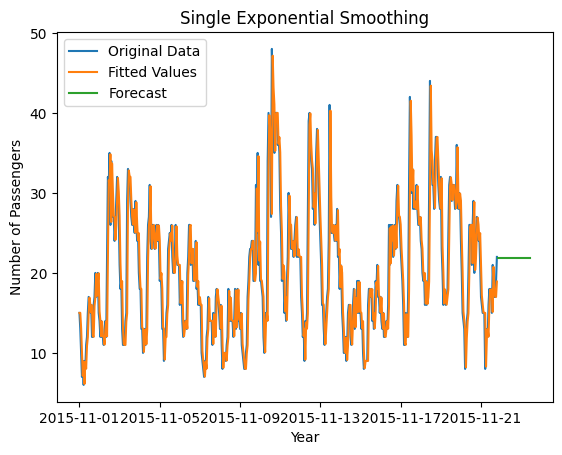

In [72]:
plt.plot(df_part, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()

#**Double Exponential Smoothing**




In [73]:
from statsmodels.tsa.api import Holt

model_double = Holt(df_part)
model_double_fit = model_double.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [74]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)

2015-11-21 20:00:00    21.927524
2015-11-21 21:00:00    21.938688
2015-11-21 22:00:00    21.949853
2015-11-21 23:00:00    21.961018
2015-11-22 00:00:00    21.972183
2015-11-22 01:00:00    21.983348
Freq: H, dtype: float64


## Visualize Double Exponential Smoothing




In [75]:
forecast_double = model_double_fit.forecast(40)

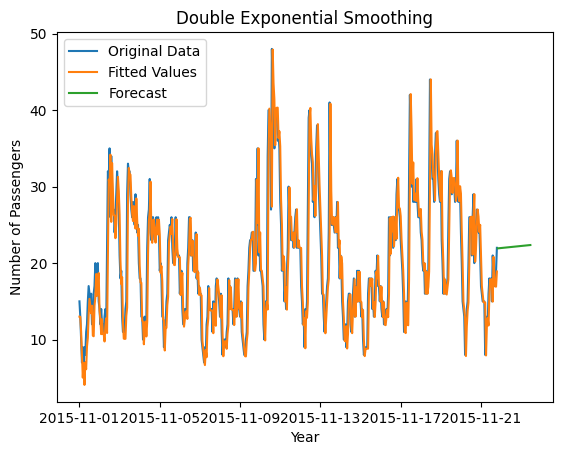

In [77]:
plt.plot(df_part, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

#**Holt-Winter’s Seasonal Smoothing**






In [79]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    df_part, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [80]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)


2015-11-21 20:00:00    21.899819
2015-11-21 21:00:00    24.411694
2015-11-21 22:00:00    27.021475
2015-11-21 23:00:00    27.021718
2015-11-22 00:00:00    25.460868
2015-11-22 01:00:00    23.080138
Freq: H, dtype: float64


## Visualize Triple Exponential Smoothing




In [81]:
forecast_triple = model_triple_fit.forecast(40)

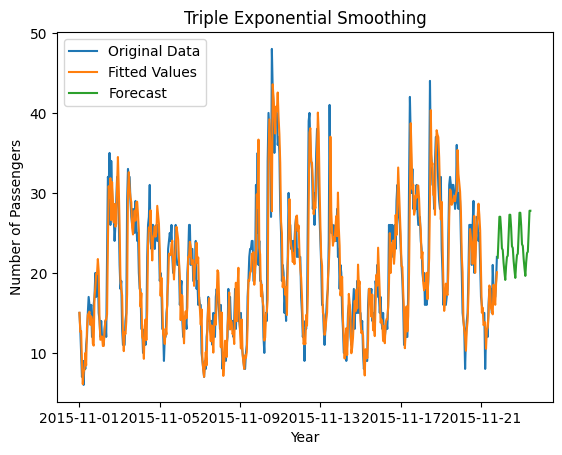

In [83]:
plt.plot(df_part, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

##**Well done :)**